In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### AUC calculation for 
 - only training on mosquito alert data
 - training on both mosquito alert and IP102 data

In [2]:
only_mosqalert_preds = pd.read_csv('../only_mosquitoalert_results.csv')

fpr_orig, tpr_orig, thresholds_orig = roc_curve(y_true=only_mosqalert_preds.label.values, 
                                                y_score=only_mosqalert_preds.pred.values)
roc_auc_score(y_true=only_mosqalert_preds.label.values, 
              y_score=only_mosqalert_preds.pred.values)

0.957736951707555

In [3]:
augmented_preds = pd.read_csv('../augmented_results.csv')

fpr_aug, tpr_aug, thresholds_aug = roc_curve(y_true=augmented_preds.label.values, 
                                             y_score=augmented_preds.pred.values)
roc_auc_score(y_true=augmented_preds.label.values, y_score=augmented_preds.pred.values)

0.9663335947890734

#### AUC scrore for the different folds in the cross-validation

In [4]:
for y in [2014, 2015, 2016, 2017, 2018, 2019]:
    print(roc_auc_score(y_true =only_mosqalert_preds[only_mosqalert_preds.year==y].label.values, 
                        y_score=only_mosqalert_preds[only_mosqalert_preds.year==y].pred.values))

1.0
0.9562831061278265
0.9719916678730556
0.9698544176706827
0.9501338090990189
0.9613012894617188


In [5]:
for y in [2014, 2015, 2016, 2017, 2018, 2019]:
    print(roc_auc_score(y_true =augmented_preds[augmented_preds.year==y].label.values, 
                        y_score=augmented_preds[augmented_preds.year==y].pred.values))

0.989010989010989
0.9668367346938775
0.9766804999276166
0.9725694444444444
0.9609797799583705
0.9688511338882665


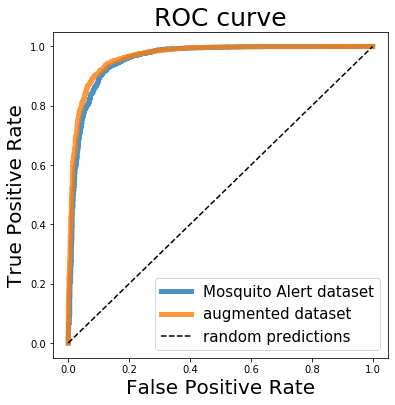

In [6]:
plt.figure(figsize = (6, 6))
plt.plot(fpr_orig, tpr_orig, lw=5, alpha=0.8, label='Mosquito Alert dataset')
plt.plot(fpr_aug, tpr_aug, lw=5, alpha=0.8, label='augmented dataset')
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.plot([0, 1], [0, 1], 'k', ls='--', label='random predictions')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.title('ROC curve', fontsize=25)
plt.legend(fontsize=15)
plt.show()

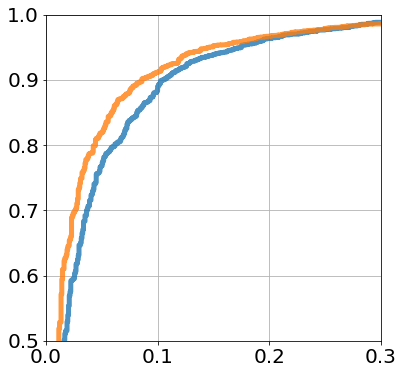

In [7]:
plt.figure(figsize = (6, 6))
plt.plot(fpr_orig, tpr_orig, lw=5, alpha=0.8, label='Mosquito Alert dataset')
plt.plot(fpr_aug, tpr_aug, lw=5, alpha=0.8, label='augmented dataset')
plt.xlim(-0.0, 0.3)
plt.ylim(0.5, 1.)
plt.plot([0, 1], [0, 1], 'k', ls='--', label='random predictions')
#plt.xlabel('False Positive Rate', fontsize=20)
#plt.ylabel('True Positive Rate', fontsize=20)
#plt.title('ROC curve', fontsize=25)
#plt.legend(fontsize=15)
plt.xticks([0, 0.1, 0.2, 0.3], fontsize=20)
plt.yticks(fontsize=20)

plt.grid()
plt.show()

Text(51.0, 0.5, 'expert annotation')

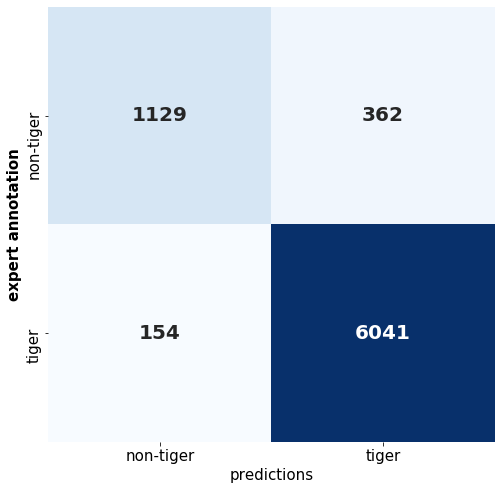

In [8]:
conf = confusion_matrix(y_true=only_mosqalert_preds.label, 
                        y_pred=np.array(only_mosqalert_preds.pred) > 0.5)


plt.figure(figsize=(8, 8))
sns.heatmap(conf, annot=True, fmt='g', cbar=False, cmap='Blues', annot_kws={'fontsize':20, 'fontweight':'bold'})
plt.xticks([0.5, 1.5], ['non-tiger', 'tiger'], fontsize=15)
plt.xlabel('predictions', fontsize=15)

plt.yticks([0.5, 1.5], ['non-tiger', 'tiger'], fontsize=15)
plt.ylabel('expert annotation', fontweight='bold', fontsize=15)

In [9]:
meta = pd.read_csv('/home/pataki/mosquito/data/meta_all_raw.csv')
meta['const'] = 1
len(meta)

7686

In [10]:
meta = meta[['year', 'isTiger', 'const']].groupby(['year', 'isTiger']).sum().reset_index()

In [11]:
pivoted = pd.pivot_table(meta, columns='year', index='isTiger', values='const', margins=True, aggfunc=sum)
pivoted

year,2014,2015,2016,2017,2018,2019,All
isTiger,,,,,,,
0,1,138,276,249,456,371,1491
1,91,2156,901,960,1180,907,6195
All,92,2294,1177,1209,1636,1278,7686


In [12]:
print(pivoted.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
year &  2014 &  2015 &  2016 &  2017 &  2018 &  2019 &   All \\
isTiger &       &       &       &       &       &       &       \\
\midrule
0       &     1 &   138 &   276 &   249 &   456 &   371 &  1491 \\
1       &    91 &  2156 &   901 &   960 &  1180 &   907 &  6195 \\
All     &    92 &  2294 &  1177 &  1209 &  1636 &  1278 &  7686 \\
\bottomrule
\end{tabular}

